## Decision Tree for Iris Classification

In [ ]:
!pip install kagglehub[pandas-datasets] graphviz

In [ ]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

### Data Preparation

In [ ]:
# Get kaggle dataset

file_path = "Iris.csv"
iris = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "saurabh00007/iriscsv",
    file_path)

iris.head()

<ipython-input-3-6538cf44c141>:4: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  iris = kagglehub.load_dataset(


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Check dataset condition
iris.info()
print("\n")
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Convinently, the dataset is in perfect condition. Therefore, cleaning effort will be minimal

### Data Cleaning

In [ ]:
# Remove unnecessary column (index)
iris.drop('Id',axis=1,inplace=True)

### Data Splitting

In [ ]:
# Set X as our feature input, and y as our target output
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

# Divide dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Model Development

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a new Decision Tree model
tree_model = DecisionTreeClassifier()

# Train
tree_model = tree_model.fit(X_train, y_train)

In [ ]:
# Evaluate
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)
acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)

Accuracy:  1.0


In [ ]:
# Test the model, with input features corespond with column orders
# Print the class with highest probability
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Export Model

In [ ]:
# Export
from sklearn.tree import export_graphviz

out_file = 'iris_tree.dot'
export_graphviz(
    tree_model,
    out_file = out_file,
    feature_names = ['SepalLengthCm',
                     'SepalWidthCm',
                     'PetalLengthCm',
                     'PetalWidthCm'],
    class_names = ['Iris-setosa',
                   'Iris-versicolor',
                   'Iris-virginica' ],
    rounded= True,
    filled =True)

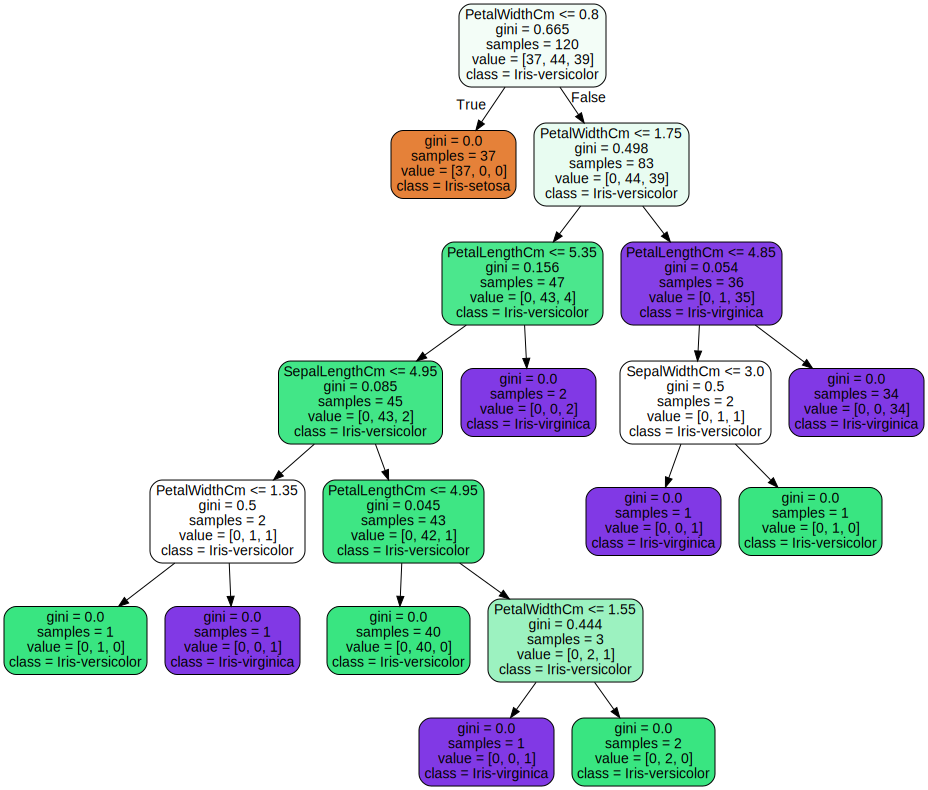

In [ ]:
# Render the model

from graphviz import Source
from IPython.display import display

Source.from_file(out_file)